# Problem 1: Line plots

# Problem 2: Contour Plots

Target: 


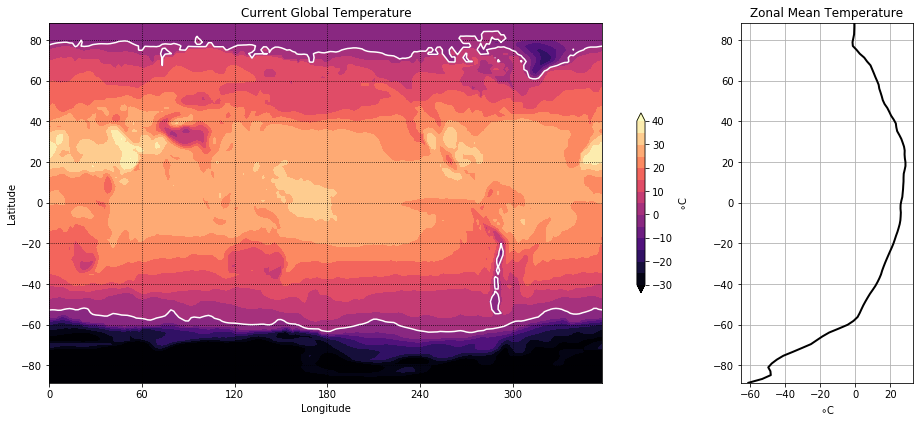

In [1]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

In [2]:
temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

import matplotlib.pyplot as plt
import numpy as np

temp.shape

(94, 192)

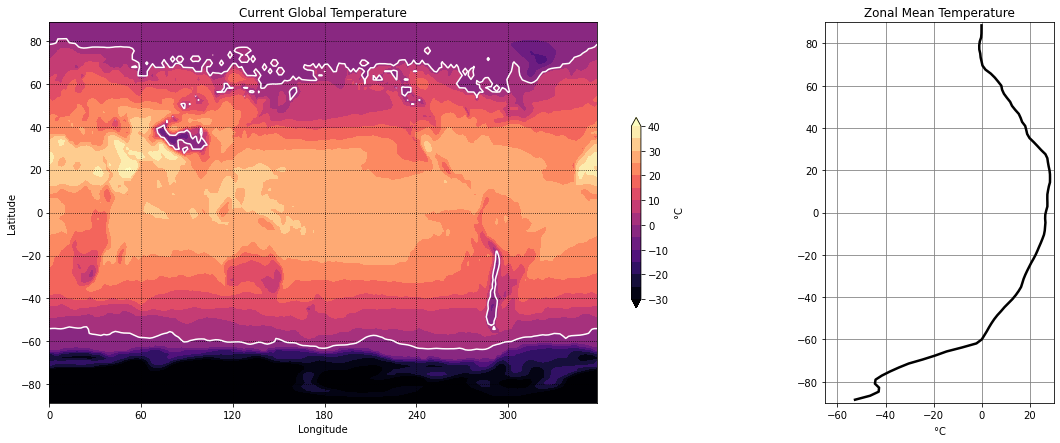

In [8]:
fig, ax = plt.subplots(figsize=(18, 7), ncols=2, gridspec_kw={'width_ratios': [3, 1]})
#fig.suptitle('My attempt to replicate the figure:', fontsize = 25)
fig.patch.set_facecolor('white')

clevels = np.arange(-30, 45, 5)
xticks_0 =  np.arange(0, 360, 60)
yticks_0 = np.arange(-80, 100, 20)

cf0 = ax[0].contourf(lon, lat, temp, clevels, cmap='magma', extend='both')
cf1 = ax[0].contour(lon, lat, temp, 0, colors = 'white', linewidths = 1.5)

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Current Global Temperature')
ax[0].set_xticks(xticks_0)
ax[0].set_yticks(yticks_0)
ax[0].grid(which = 'major', linestyle = 'dotted', color = 'k')

cbar = plt.colorbar(cf0, ax = ax[0], shrink = 0.5)
cbar.set_label('$\degree$C')

xticks_1 =  np.arange(-60, 40, 20)
yticks_1 = np.arange(-80, 100, 20)


ax[1].plot(temp.mean(axis = 1), lat, color = 'k', linewidth = 2.5)

ax[1].set_xlim([-65,30])
ax[1].set_ylim([-90,90])
ax[1].set_xticks(xticks_1)
ax[1].set_yticks(yticks_1)
ax[1].grid(which = 'major', linestyle = '-', color = 'grey')
ax[1].set_title('Zonal Mean Temperature')
ax[1].set_xlabel('$\degree$C')

plt.savefig('Contour Assignment.png', bbox_inches='tight', pad_inches=0.5)



# Problem 3: Scatter plots